In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  LSTM,Dense,Conv2D
sc=StandardScaler()


In [ ]:
data=pd.concat([pd.read_csv("test.csv"),pd.read_csv("train.csv")])

In [ ]:
data

,Id,CHR,MAPINFO,UCSC_CpG_Islands_Name,UCSC_RefGene_Group,Relation_to_UCSC_CpG_Island,Regulatory_Feature_Group,Forward_Sequence,seq,Beta
0,cg00007981,11,93862594,chr11:93861560-93862773,1stExon,Island,NaN,AGCCCACGGAGCCCAAGTTCAAGGGGCTGCGACTGGAGCTGGCTGT...,CACACTCACTACCGTTTCCGCGCCACCCTCTCACGCGGAGCTCCTG...,NaN
1,cg00012397,11,17756435,chr11:17756056-17758286,TSS1500;TSS1500,Island,NaN,GCCCGGGCGGCAGCAGCGTCGCGGCGGCGGCGGCAGCGGCCGCTCC...,CCACCCCCAGGACCAACTGTGAAGATGGAGGAATCACAGCAAGCAG...,NaN
2,cg00041759,11,66024941,chr11:66024910-66026253,TSS200;TSS1500;5'UTR;TSS1500;1stExon,Island,Promoter_Associated,TGTACTCCAGGAAGCCCAACCTTCTCCCTGCGCCTCAGTTTCTCCC...,CTCAGCTACTGGAGAGGTTGAGGCAGGAGAATTGCTTGAACCCTGG...,NaN
3,cg00043379,11,69634240,chr11:69632033-69634710,TSS200,Island,NaN,GCTCTGAAAGGTCCCCTACCCGCCCCTCCCCCGCCCCCTCCCCCAG...,CGAACCCCAGCGCGCGCTCTTCTCCCGGACGTGTAGGTTGAGGAGG...,NaN
4,cg00080012,11,85955689,chr11:85955808-85956517,TSS200;TSS200,N_Shore,Promoter_Associated,TTGCATTTCTATCTTCAAGGAAGAATTAGGTTATGAATAGTTCCGT...,ACTGATGTCCTGGTTATAAAGTTATCATGCAGAAATAATTCAAGTA...,NaN
...,...,...,...,...,...,...,...,...,...,...
29060,ch.10.2633792F,10,123987885,NaN,Body;Body;Body;Body,NaN,NaN,AAGCAGTCCTCTGCCGCTTCGTCCTTGATGGCAGAGGGCAAGGGAC...,AAGAGACTCTGCAGGCTGCCCAGGGTGGTGAGAACAATGATGATGG...,0.0
29061,ch.10.125213076F,10,125223086,NaN,NaN,NaN,NaN,AGCAGAGCAGGAGTGGGATTCTGAAACCCTTGCTCTTCTGGTTATT...,TTACTCAGACGCTGCAGGTTGTGAATTTCAGTCCTGGTAAATCATG...,0.0
29062,ch.10.2809628F,10,130365546,NaN,NaN,NaN,NaN,ATGCTTAGTACTTCATTAAGACATTTGTGAGCAAACTCATTCCCAT...,CTCCAAGCCTGAAGAGCCTCTGCCTTCCCTTCCCTCACTCTGCGTG...,0.0
29063,ch.10.130844938F,10,130954948,NaN,NaN,NaN,NaN,GATCGTCCAAGGTGTCTCTTAGTATGATCATGCCTTATGATTAAAG...,TCATGGCGGCAGGGATGGAAGCTATGCATGGGTTCAGCAACATGGA...,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49676 entries, 0 to 29064
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           49676 non-null  object 
 1   CHR                          49676 non-null  int64  
 2   MAPINFO                      49676 non-null  int64  
 3   UCSC_CpG_Islands_Name        41309 non-null  object 
 4   UCSC_RefGene_Group           43091 non-null  object 
 5   Relation_to_UCSC_CpG_Island  41309 non-null  object 
 6   Regulatory_Feature_Group     27832 non-null  object 
 7   Forward_Sequence             49676 non-null  object 
 8   seq                          49676 non-null  object 
 9   Beta                         29065 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 4.2+ MB


In [ ]:
data.var()

CHR        3.868189e+01
MAPINFO    3.513058e+15
Beta       2.114055e-01
dtype: float64

In [ ]:
data.mean()

CHR        9.338332e+00
MAPINFO    7.285566e+07
Beta       3.035266e-01
dtype: float64

In [ ]:
data.shape

(49676, 10)

In [ ]:
data.isna().mean()

Id                             0.000000
CHR                            0.000000
MAPINFO                        0.000000
UCSC_CpG_Islands_Name          0.148847
UCSC_RefGene_Group             0.109015
Relation_to_UCSC_CpG_Island    0.148847
Regulatory_Feature_Group       0.382600
Forward_Sequence               0.000000
seq                            0.000000
Beta                           0.501048
dtype: float64

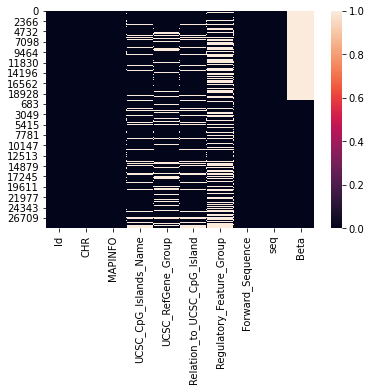

In [ ]:
sb.heatmap(data.isna())

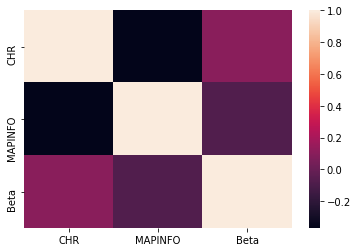

In [ ]:
sb.heatmap(data.corr())

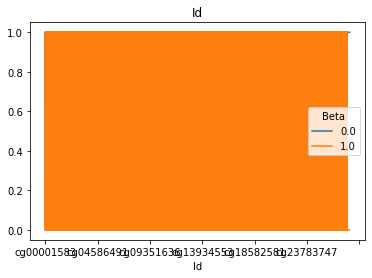

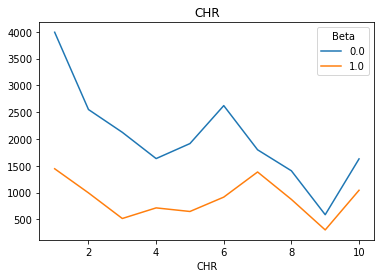

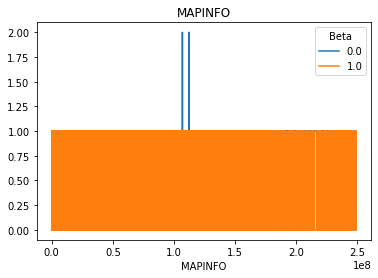

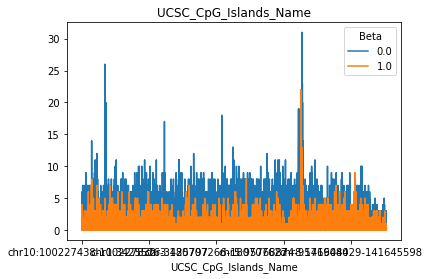

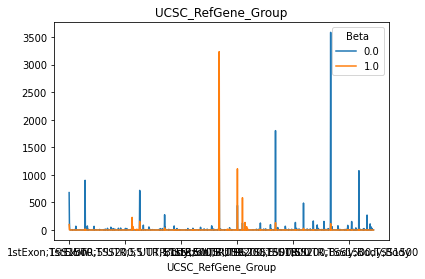

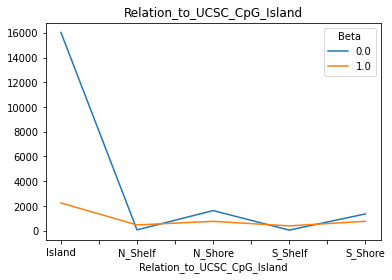

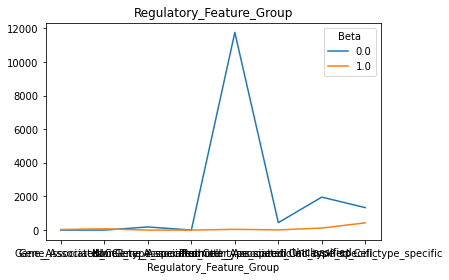

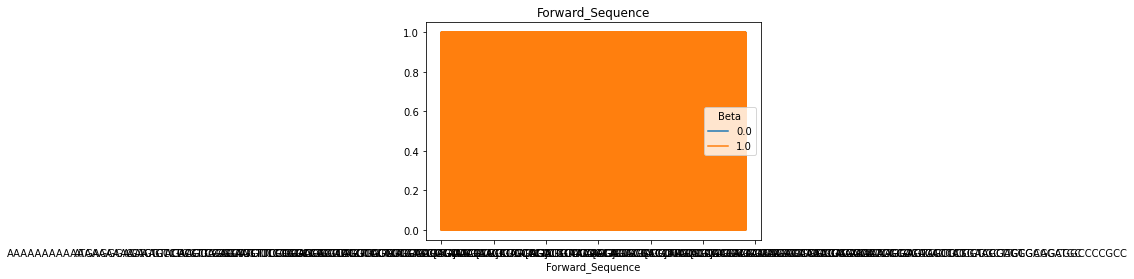

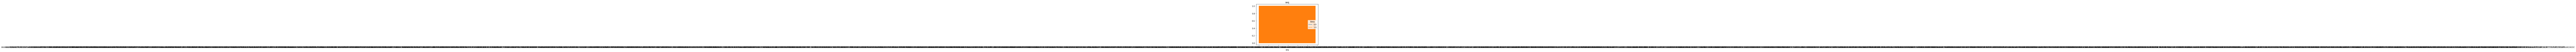

In [ ]:
for i in data.columns[0:-1]:
  plt.figure
  pd.crosstab(data[i],data[data.columns[-1]]).plot()
  plt.title(i)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


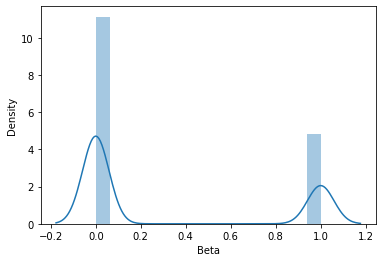

In [ ]:
#target
sb.distplot(data.Beta)
   

In [ ]:
#
def normalisation(train,test):
  train=sc.fit_transform(train)
  test=sc.fit_transform(test)
  return train,test

In [ ]:
train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
test_copy=test.copy()

In [ ]:
test

,Id,CHR,MAPINFO,UCSC_CpG_Islands_Name,UCSC_RefGene_Group,Relation_to_UCSC_CpG_Island,Regulatory_Feature_Group,Forward_Sequence,seq
0,cg00007981,11,93862594,chr11:93861560-93862773,1stExon,Island,NaN,AGCCCACGGAGCCCAAGTTCAAGGGGCTGCGACTGGAGCTGGCTGT...,CACACTCACTACCGTTTCCGCGCCACCCTCTCACGCGGAGCTCCTG...
1,cg00012397,11,17756435,chr11:17756056-17758286,TSS1500;TSS1500,Island,NaN,GCCCGGGCGGCAGCAGCGTCGCGGCGGCGGCGGCAGCGGCCGCTCC...,CCACCCCCAGGACCAACTGTGAAGATGGAGGAATCACAGCAAGCAG...
2,cg00041759,11,66024941,chr11:66024910-66026253,TSS200;TSS1500;5'UTR;TSS1500;1stExon,Island,Promoter_Associated,TGTACTCCAGGAAGCCCAACCTTCTCCCTGCGCCTCAGTTTCTCCC...,CTCAGCTACTGGAGAGGTTGAGGCAGGAGAATTGCTTGAACCCTGG...
3,cg00043379,11,69634240,chr11:69632033-69634710,TSS200,Island,NaN,GCTCTGAAAGGTCCCCTACCCGCCCCTCCCCCGCCCCCTCCCCCAG...,CGAACCCCAGCGCGCGCTCTTCTCCCGGACGTGTAGGTTGAGGAGG...
4,cg00080012,11,85955689,chr11:85955808-85956517,TSS200;TSS200,N_Shore,Promoter_Associated,TTGCATTTCTATCTTCAAGGAAGAATTAGGTTATGAATAGTTCCGT...,ACTGATGTCCTGGTTATAAAGTTATCATGCAGAAATAATTCAAGTA...
...,...,...,...,...,...,...,...,...,...
20606,cg27603882,22,50220531,chr22:50220118-50220822,NaN,Island,Promoter_Associated,GGGGTCCCGCTGCTACGGATTCTCAGAACTCCCGCGTCCGCTCACA...,ATGTTGAAACTAGATTGCAATTACCTACAGAAAGGAATAGGAGAGA...
20607,cg27614706,22,50239170,chr22:50241735-50243918,NaN,N_Shelf,NaN,TTTACGGAGACGTCTTCATGTAGGCATATGGCGCATTAGGAACCGC...,ATACCTAGAGGATCTGCAAAGGAACAAAAATGATCATGCTCCCCTG...
20608,cg27620176,22,47054067,chr22:47054031-47054274,Body,Island,NaN,CACCCCTGCCCCAGCATCCCAGAGTCGGGGTCGCGTGGACATGAGC...,TGGGGAGCGCCTGGGCAGGGTCTTGTCAGTGGCCCAGGCCTCTGAG...
20609,cg27645955,22,21386885,chr22:21386493-21387000,TSS200,Island,Unclassified_Cell_type_specific,GCTGCCGCAGCCGCTGCCTCCGCTCTGAGCACTGAGCCCGCCCAGT...,GAGCACAGCAGGGCCAGCCACCTCCTTGGCCACGGCACCTGTGAGC...


In [ ]:
for i in train.select_dtypes('object'):
  train[i]=len(train[i])
  train[i]=train[i].apply(lambda x:0 if pd.isna(x) else x )

In [ ]:
for i in train.select_dtypes('int'):
  train[i]=train[i].apply(lambda x:0 if pd.isna(x) else x )
for i in train.select_dtypes('float'):
  train[i]=train[i].apply(lambda x:0 if pd.isna(x) else x )

In [ ]:
for i in test.select_dtypes('int'):
  test[i]=test[i].apply(lambda x:0 if pd.isna(x) else x )
for i in test.select_dtypes('float'):
  test[i]=test[i].apply(lambda x:0 if pd.isna(x) else x )
for i in test.select_dtypes('object'):
  test[i]=len(test[i])
  test[i]=test[i].apply(lambda x:0 if pd.isna(x) else x )
  

In [ ]:
xtrain=train.drop("Beta",axis=1)
ytrain=train["Beta"]

xtrain,xtest=normalisation(xtrain,test)


In [ ]:
modele= Sequential()
modele.add(Dense(units=9,activation='relu',input_shape=(9,),kernel_initializer='uniform'))
modele.add(Dense(units=9,activation='relu',kernel_initializer='uniform'))
modele.add(Dense(units=8,activation='relu',kernel_initializer='uniform'))
modele.add(Dense(units=8,activation='relu',kernel_initializer='uniform'))
modele.add(Dense(units=8,activation='relu',kernel_initializer='uniform'))
modele.add(Dense(units=1,activation='sigmoid'))
modele.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
modele.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_25 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 80        
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 413
Trainable params: 413
Non-trainable params: 0
________________________________________________________

In [ ]:
 modele.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
909/909 [==============================] - 1s 1ms/step - loss: 0.5123 - accuracy: 0.7738
Epoch 2/100
909/909 [==============================] - 1s 1ms/step - loss: 0.5122 - accuracy: 0.7742
Epoch 3/100
909/909 [==============================] - 1s 1ms/step - loss: 0.5126 - accuracy: 0.7745
Epoch 4/100
909/909 [==============================] - 1s 1ms/step - loss: 0.5124 - accuracy: 0.7760
Epoch 5/100
909/909 [==============================] - 1s 1ms/step - loss: 0.5125 - accuracy: 0.7741
Epoch 6/100
909/909 [==============================] - 1s 2ms/step - loss: 0.5120 - accuracy: 0.7738
Epoch 7/100
909/909 [==============================] - 1s 2ms/step - loss: 0.5122 - accuracy: 0.7742
Epoch 8/100
909/909 [==============================] - 1s 2ms/step - loss: 0.5122 - accuracy: 0.7747
Epoch 9/100
909/909 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.7750
Epoch 10/100
909/909 [==============================] - 1s 1ms/step - loss: 0.5122 - accura

In [ ]:

ypredict=modele.predict_classes(xtest)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
res=[]


In [ ]:
for i in ypredict:
  for j in i:
    res.append(j)

In [ ]:
res

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [ ]:
final=pd.DataFrame({"Id":test_copy["Id"],"Beta":res})


In [ ]:
final.to_csv("final-res.csv",index=False)